In [1]:
#  pip install openpyxl

In [2]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter5')


In [6]:
# Load the data from the first sheet
df = pd.read_excel(r'hazard_exposure_adaptation_index_results-hazard1-AGE.xlsx', sheet_name='Sheet1')

# Display the first few rows of the data to understand its structure
df.head()

# Calculate the Health Risk Index
df['Health Risk Index'] = - df['Adaptation Index'] + df['Exposure Index'] + df['Hazard Index']

In [7]:

# Display the first few rows of the data to understand its structure
df.head()


,年份,地区,HWA,HWD,HWF,HWM,HWN,Area,老龄化率,老年人口(人),...,互联网上网人数(万人),互联网上网人数(人),人均城市道路面积(平方米),年末常住人口(万人),人口死亡率(‰),人口死亡数量(人),Hazard Index,Exposure Index,Adaptation Index,Health Risk Index
0,2000,安徽,2.806277,42.481640,43.265774,1.224665,1.216290,523136.414033,0.074500,4.539285e+06,...,54,540000,8.82,6093,5.76,350956.8,0.346019,0.401369,0.140099,0.607289
1,2001,安徽,3.527204,38.955854,45.259968,1.621688,1.637025,466566.665089,0.081203,4.976102e+06,...,81,810000,9.35,6128,5.85,358488.0,0.364760,0.423200,0.142231,0.645729
2,2002,安徽,2.150178,23.560103,43.397228,0.824621,3.331786,476183.743887,0.082363,5.060386e+06,...,107,1070000,9.91,6144,5.17,317644.8,0.347255,0.426863,0.138592,0.635525
3,2003,安徽,4.758522,28.023931,34.850894,2.295770,1.578078,351681.119503,0.081897,5.047301e+06,...,184,1840000,10.51,6163,5.20,320476.0,0.266941,0.425395,0.141455,0.550880
4,2004,安徽,3.813421,35.202793,44.161442,1.562106,1.814993,314209.543964,0.085178,5.304873e+06,...,240,2400000,11.14,6228,5.50,342540.0,0.354436,0.437988,0.147014,0.645410


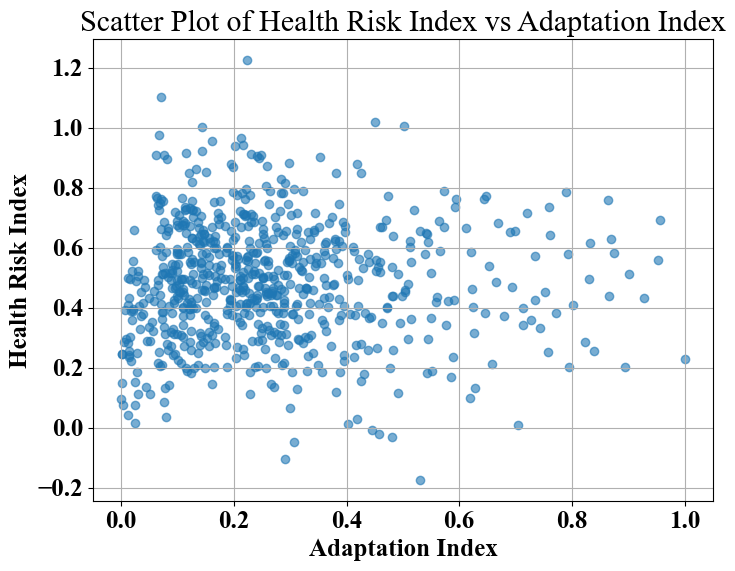

In [8]:
# Calculate the Health Risk Index
df['Health Risk Index'] = - df['Adaptation Index'] + df['Exposure Index'] + df['Hazard Index']

# Plot scatter plot of Health Risk Index vs Adaptation Index
plt.figure(figsize=(8, 6))
plt.scatter(df['Adaptation Index'], df['Health Risk Index'], alpha=0.6)
plt.xlabel("Adaptation Index")
plt.ylabel("Health Risk Index")
plt.title("Scatter Plot of Health Risk Index vs Adaptation Index")
plt.grid(True)
plt.show()


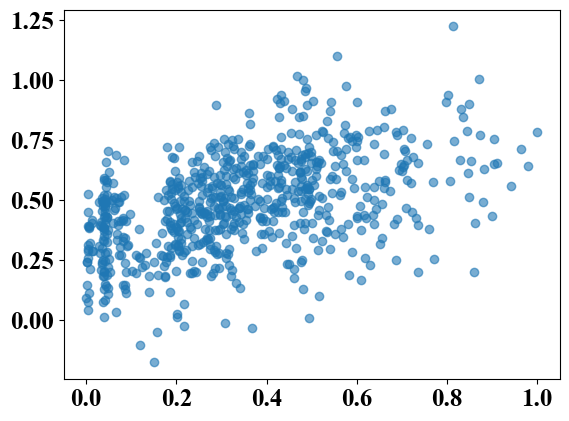

In [9]:
plt.scatter(df['Exposure Index'], df['Health Risk Index'], alpha=0.6)

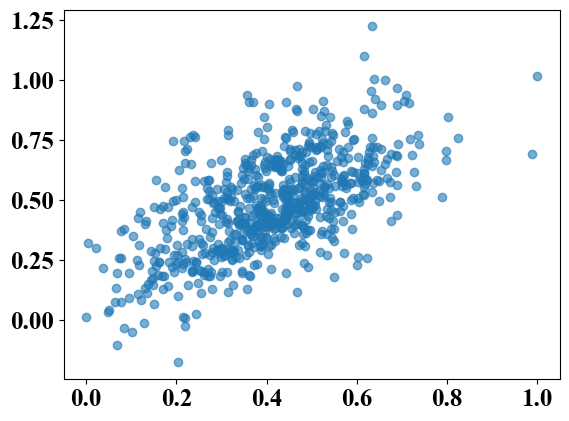

In [10]:
plt.scatter(df['Hazard Index'], df['Health Risk Index'], alpha=0.6)

In [12]:
# Reload necessary libraries since execution state was reset
import pandas as pd

# Reload the Excel file
file_path = "hazard_exposure_adaptation_index_results-hazard1-AGE.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name='Sheet1')

# Recalculate the Health Risk Index
df['Health Risk Index'] = - df['Adaptation Index'] + df['Exposure Index'] + df['Hazard Index']

# Define the quantile values
quantiles = [0.2, 0.4, 0.6, 0.8]

# Compute the quantiles for each index
quantile_values = df[['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']].quantile(quantiles)

print("quantile_values",quantile_values)

# # Display the results
# import ace_tools as tools
# tools.display_dataframe_to_user(name="指数分位数", dataframe=quantile_values)


quantile_values      Hazard Index  Exposure Index  Adaptation Index  Health Risk Index
0.2      0.278531        0.152809          0.108128           0.314741
0.4      0.377857        0.273685          0.187306           0.438762
0.6      0.449721        0.385190          0.265391           0.535828
0.8      0.533948        0.514719          0.389266           0.652062


In [14]:
# Calculate the quantiles along with min and max values for each index
stats = df[['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']].describe(percentiles=[0.2, 0.4, 0.6, 0.8]).loc[['min', '20%', '40%', '60%', '80%', 'max']]

# Save to CSV
output_path = "index_quantiles_min_max.csv"
stats.to_csv(output_path, index_label="Statistic")




In [16]:
# Re-load the necessary libraries since the execution state was reset again
import pandas as pd

# Reload the file
file_path = "hazard_exposure_adaptation_index_results-hazard1-AGE.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name='Sheet1')

# Recalculate the Health Risk Index
df['Health Risk Index'] = - df['Adaptation Index'] + df['Exposure Index'] + df['Hazard Index']

# Define the quantile bins
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Create an empty dataframe to store results
yearly_counts = pd.DataFrame()

# Process each index separately
for index in ['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']:
    # Compute quantiles for binning
    quantile_bins = df[index].quantile(bins).values
    labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]

    # Bin the data per year
    df[f'{index}_Bin'] = pd.cut(df[index], bins=quantile_bins, labels=labels, include_lowest=True)

    # Count occurrences per year for each bin
    counts = df.groupby(["年份", f"{index}_Bin"]).size().unstack(fill_value=0)
    
    # Rename columns
    counts.columns = [f"{index}_{col}" for col in counts.columns]

    # Merge results
    if yearly_counts.empty:
        yearly_counts = counts
    else:
        yearly_counts = yearly_counts.join(counts, how="outer")

# Reset index for better formatting
yearly_counts.reset_index(inplace=True)

# Save to CSV
output_path = "yearly_index_bins.csv"
yearly_counts.to_csv(output_path, index=False)




# 基于百分位数的条形图

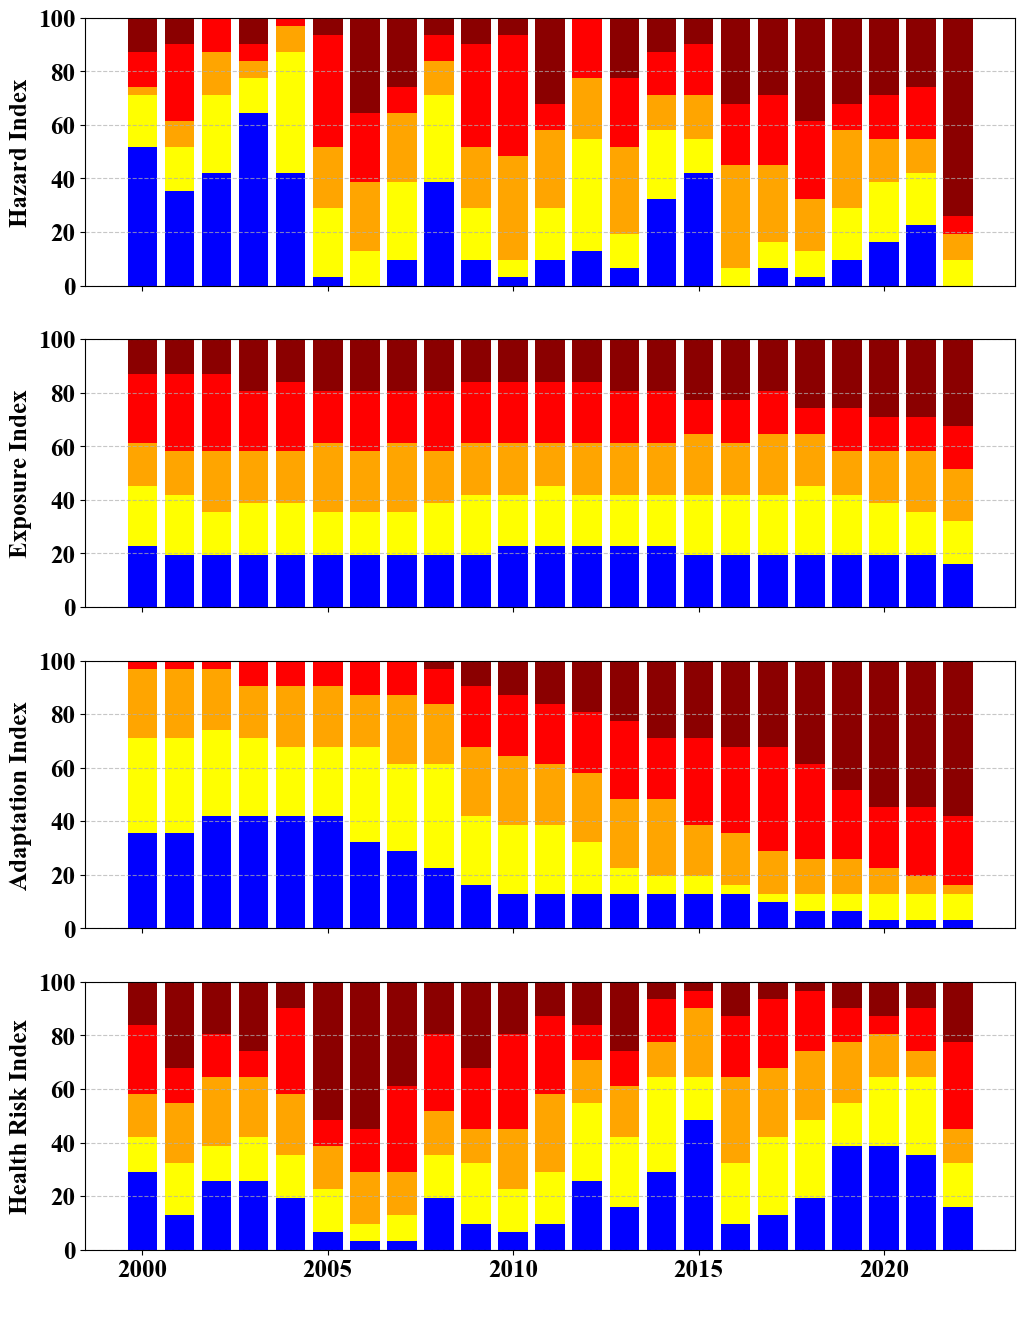

In [35]:
# 重新加载必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 重新加载文件
file_path = "hazard_exposure_adaptation_index_results-hazard1-AGE.xlsx"
xls = pd.ExcelFile(file_path)

# 读取数据
df = pd.read_excel(xls, sheet_name='Sheet1')

# 计算 Health Risk Index
df['Health Risk Index'] = - df['Adaptation Index'] + df['Exposure Index'] + df['Hazard Index']

# 定义指数区间
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

# 创建一个存储每年各个指数分布情况的 DataFrame
yearly_counts = pd.DataFrame()

# 计算各个指数的区间分布
for index in ['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']:
    # 计算分位数分界点
    quantile_bins = df[index].quantile(bins).values
    labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]

    # 分箱操作
    df[f'{index}_Bin'] = pd.cut(df[index], bins=quantile_bins, labels=labels, include_lowest=True)

    # 统计每个年份不同区间的数量
    counts = df.groupby(["年份", f"{index}_Bin"]).size().unstack(fill_value=0)

    # 重命名列
    counts.columns = [f"{index}_{col}" for col in counts.columns]

    # 合并数据
    if yearly_counts.empty:
        yearly_counts = counts
    else:
        yearly_counts = yearly_counts.join(counts, how="outer")

# 重置索引，保证格式清晰
yearly_counts.reset_index(inplace=True)

# 归一化数据，转换为百分比
yearly_counts_percent = yearly_counts.copy()
for index in ['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']:
    # 计算该指数所有区间的总和
    total = yearly_counts[[f"{index}_0-0.2", f"{index}_0.2-0.4", f"{index}_0.4-0.6", f"{index}_0.6-0.8", f"{index}_0.8-1"]].sum(axis=1)
    for label in ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]:
        yearly_counts_percent[f"{index}_{label}"] = yearly_counts[f"{index}_{label}"] / total * 100  # 转换为百分比

# 绘制堆叠柱状图
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# 定义颜色
colors = ['blue', 'yellow', 'orange', 'red', 'darkred']
labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]

# 遍历4个指数，绘制子图
indices = ['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']
for i, index in enumerate(indices):
    ax = axes[i]
    bottom = None  # 初始化堆叠起始值

    # 绘制每个区间的堆叠柱状图
    for j, label in enumerate(labels):
        col_name = f"{index}_{label}"
        if bottom is None:
            ax.bar(yearly_counts_percent['年份'], yearly_counts_percent[col_name], label=label, color=colors[j])
            bottom = yearly_counts_percent[col_name].copy()
        else:
            ax.bar(yearly_counts_percent['年份'], yearly_counts_percent[col_name], label=label, color=colors[j], bottom=bottom)
            bottom += yearly_counts_percent[col_name]

    ax.set_ylabel(index)
    ax.set_ylim(0, 100)  # 归一化后，最大值应为100%
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# 设置横坐标与图例
axes[-1].set_xlabel(" ")
# axes[0].legend(title="Index, loc="upper right")

# 总标题
# plt.suptitle("各年份不同指数的堆叠柱状图", fontsize=14)
plt.show()


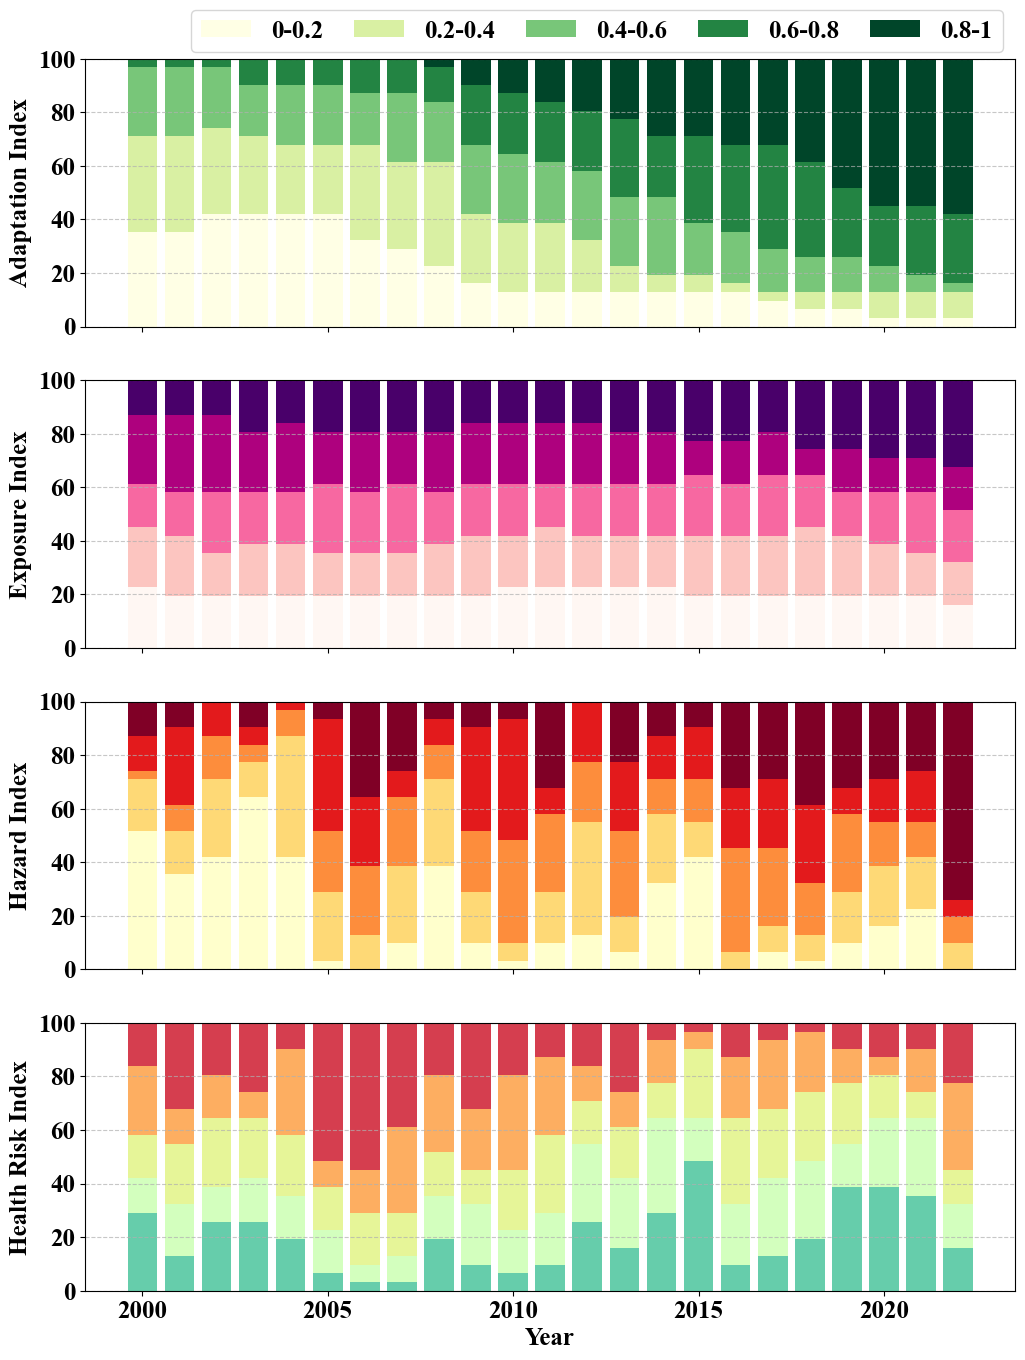

In [89]:
# 重新绘制堆叠柱状图
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# 颜色方案对应
color_map = {
    "Hazard Index": ['#FFFFCC', '#FED976','#FD8D3C','#E31A1C','#800026'],
    "Exposure Index": [ '#FFF7F3', '#FCC5C0','#F768A1','#AE017E','#49006A'],
    "Adaptation Index": ['#FFFFE5', '#D9F0A3','#78C679','#238443','#004529'],
    "Health Risk Index": [ '#66CDAB', '#D3FFBE','#E6F598','#FDAE61','#D53E4F']
}

labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]

# 遍历4个指数，绘制子图
indices = ['Adaptation Index', 'Exposure Index','Hazard Index', 'Health Risk Index']
for i, index in enumerate(indices):
    ax = axes[i]
    bottom = None  # 初始化堆叠起始值

    # 选取对应指数的颜色
    colors = color_map[index]

    # 绘制每个区间的堆叠柱状图
    for j, label in enumerate(labels):
        col_name = f"{index}_{label}"
        if bottom is None:
            ax.bar(yearly_counts_percent['年份'], yearly_counts_percent[col_name], label=label, color=colors[j])
            bottom = yearly_counts_percent[col_name].copy()
        else:
            ax.bar(yearly_counts_percent['年份'], yearly_counts_percent[col_name], label=label, color=colors[j], bottom=bottom)
            bottom += yearly_counts_percent[col_name]

    ax.set_ylabel(index)
    ax.set_ylim(0, 100)  # 归一化后，最大值应为100%
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# 设置横坐标与图例
axes[-1].set_xlabel("Year")
axes[0].legend( bbox_to_anchor=(0.1, 1.01, 0.9, 0.22), ncol=5, mode="expand")
axes[1].legend( bbox_to_anchor=(0.1, 1.01, 0.9, -1.5), ncol=5, mode="expand")
# plt.legend(fontsize=14, bbox_to_anchor=(0.1, 1.01, 0.9, 1.12), loc='lower left',
#            handletextpad=0.6, ncol=4, mode="expand", borderaxespad=0., handlelength=1.5)
# 总标题
# plt.suptitle("各年份不同指数的堆叠柱状图（按分级颜色）", fontsize=14)

# plt.tight_layout()
# 保存图像
plt.savefig(r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-06-02-指数年际变化1.png', dpi=400, bbox_inches='tight',facecolor="none", transparent=True)
plt.show()


# 25分区分级-省份尺度

In [92]:
import pandas as pd

# Load the data from the Excel file
yearbook_file = 'hazard_exposure_adaptation_index_results-hazard1-AGE.xlsx'
df = pd.read_excel(yearbook_file, sheet_name='Sheet1')

# Calculate the Health Risk Index
df['Health Risk Index'] = -df['Adaptation Index'] + df['Exposure Index'] + df['Hazard Index']

# Compute the mean of each index for each province over the years 2000-2022
mean_indices_corrected = df.groupby('地区').mean()

# Define function to categorize Health Risk Index
def categorize_health_risk(risk_index):
    if risk_index >= 0.8:
        return "高"
    elif risk_index >= 0.6:
        return "中高"
    elif risk_index >= 0.4:
        return "中"
    elif risk_index >= 0.2:
        return "中低"
    else:
        return "低"

# Define function to categorize Adaptation Index (Social Adaptability)
def categorize_adaptation_index(adapt_index):
    if adapt_index >= 0.8:
        return "高"
    elif adapt_index >= 0.6:
        return "中高"
    elif adapt_index >= 0.4:
        return "中"
    elif adapt_index >= 0.2:
        return "中低"
    else:
        return "低"

# Apply categorization functions
mean_indices_corrected['Health Risk Category'] = mean_indices_corrected['Health Risk Index'].apply(categorize_health_risk)
mean_indices_corrected['Adaptation Category'] = mean_indices_corrected['Adaptation Index'].apply(categorize_adaptation_index)

# Define the risk prevention investment matrix
investment_matrix = {
    "高":    {"低": "一级投入", "中低": "一级投入", "中": "二级投入", "中高": "三级投入", "高": "四级投入"},
    "中高":  {"低": "一级投入", "中低": "一级投入", "中": "二级投入", "中高": "三级投入", "高": "四级投入"},
    "中":    {"低": "二级投入", "中低": "二级投入", "中": "二级投入", "中高": "三级投入", "高": "四级投入"},
    "中低":  {"低": "三级投入", "中低": "三级投入", "中": "三级投入", "中高": "三级投入", "高": "四级投入"},
    "低":    {"低": "四级投入", "中低": "四级投入", "中": "四级投入", "中高": "四级投入", "高": "四级投入"}
}

# Assign investment levels based on matrix
mean_indices_corrected['Investment Level'] = mean_indices_corrected.apply(
    lambda row: investment_matrix[row['Health Risk Category']][row['Adaptation Category']], axis=1
)

# Define the output CSV file path
output_csv_path = "province_investment_levels.csv"

# Save the results to a CSV file
mean_indices_corrected[['Health Risk Index', 'Adaptation Index', 'Health Risk Category', 'Adaptation Category', 'Investment Level']].to_csv(output_csv_path, encoding='utf-8-sig')

# Provide the download link
output_csv_path


'province_investment_levels.csv'

# 基于数值区间的条形图

C:\Users\HP\AppData\Local\Temp\ipykernel_2152\2752394499.py:122: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_2152\2752394499.py:122: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  plt.tight_layout()
D:\Users\HP\miniconda3\envs\ee\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\HP\miniconda3\envs\ee\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


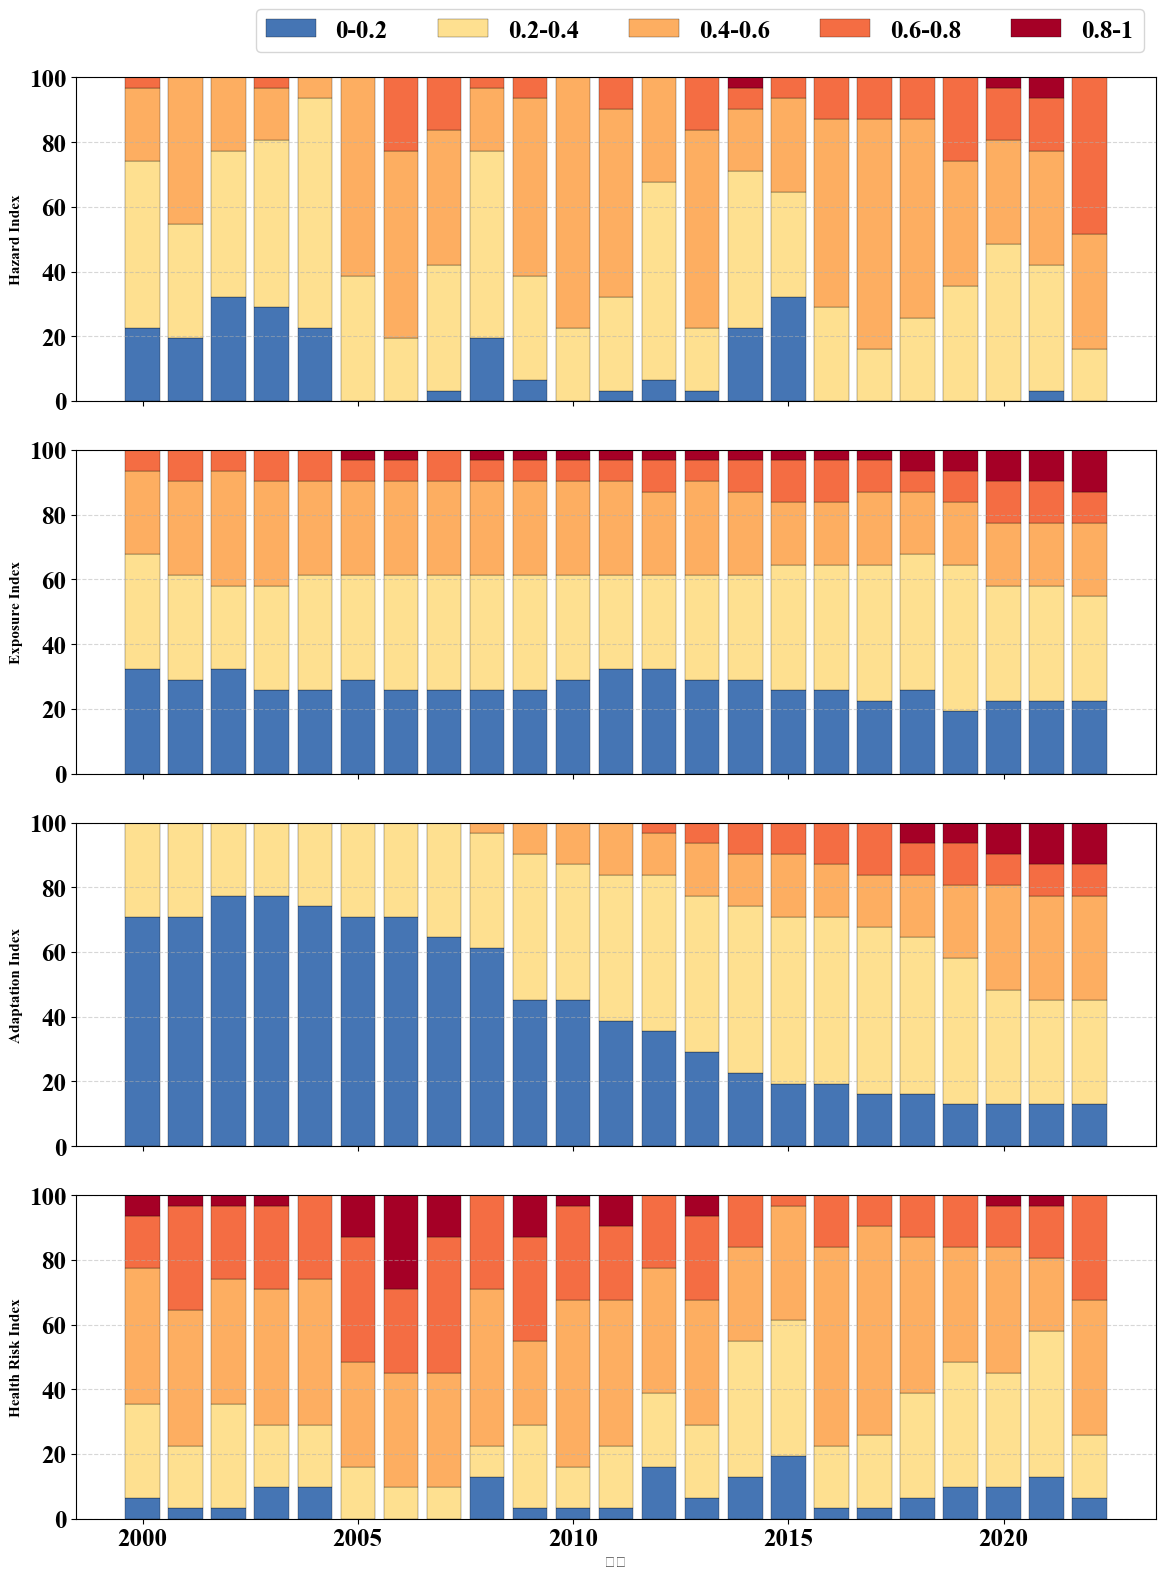

In [4]:
# 重新加载必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) 读取数据
# -----------------------------
file_path = "hazard_exposure_adaptation_index_results-hazard1-AGE.xlsx"
sheet_name = "Sheet1"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# 2) 计算 Health Risk Index（与原式一致）
#    R = -A + E + H
# -----------------------------
required_cols = ['年份', 'Hazard Index', 'Exposure Index', 'Adaptation Index']
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"缺少必要列：{missing}，请检查 Excel 表头。")

df['Health Risk Index'] = - df['Adaptation Index'] + df['Exposure Index'] + df['Hazard Index']

# -----------------------------
# 3) 稳健性处理：裁剪到 [0, 1]
# -----------------------------
for col in ['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']:
    df[col] = np.clip(df[col], 0, 1)

# -----------------------------
# 4) 使用固定区间分箱（非分位数）
#    常见 5 档：0-0.2, 0.2-0.4, 0.4-0.6, 0.6-0.8, 0.8-1
#    如需 4 档（0,0.2,0.4,0.8,1），将 fixed_bins 改成相应列表，
#    并同步调整 labels。
# -----------------------------
fixed_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]

indices = ['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']

# -----------------------------
# 5) 逐指数分箱并统计每年各区间数量
# -----------------------------
yearly_counts = None

for index in indices:
    bin_col = f"{index}_Bin"
    df[bin_col] = pd.cut(
        df[index],
        bins=fixed_bins,
        labels=labels,
        include_lowest=True,   # 包含左端点 0
        right=True             # 默认右闭区间 (0,0.2], (0.2,0.4]...
    )

    # 统计：每年×区间 的数量
    counts = df.groupby(['年份', bin_col]).size().unstack(fill_value=0)

    # 确保所有 labels 列都在（有些区间可能在某些年没有数据）
    counts = counts.reindex(columns=labels, fill_value=0)

    # 重命名列：指明属于哪个指数
    counts.columns = [f"{index}_{c}" for c in counts.columns]

    # 合并所有指数的年度统计
    if yearly_counts is None:
        yearly_counts = counts
    else:
        yearly_counts = yearly_counts.join(counts, how='outer')

# 重置索引为普通列
yearly_counts = yearly_counts.reset_index()

# -----------------------------
# 6) 转百分比（逐指数、逐年归一化）
# -----------------------------
yearly_counts_percent = yearly_counts.copy()

for index in indices:
    cols = [f"{index}_{lab}" for lab in labels]
    # 某些年份该指数可能全部为 0（极端情况），加一个安全处理
    total = yearly_counts[cols].sum(axis=1).replace(0, np.nan)
    for lab in labels:
        c = f"{index}_{lab}"
        yearly_counts_percent[c] = (yearly_counts[c] / total) * 100

    # total 为 0 的年份，用 0 填回（或者也可保持 NaN）
    yearly_counts_percent[cols] = yearly_counts_percent[cols].fillna(0)

# -----------------------------
# 7) 画图：四个指数的堆叠百分比柱状图
# -----------------------------
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# 颜色（可按需调整）
colors = ['#4575b4', '#fee090', '#fdae61', '#f46d43', '#a50026']  # 蓝-黄-橙-红-暗红
# 与 labels 顺序一致
assert len(colors) == len(labels)

x = yearly_counts_percent['年份']

for i, index in enumerate(indices):
    ax = axes[i]
    bottoms = np.zeros(len(x))
    for j, lab in enumerate(labels):
        col = f"{index}_{lab}"
        y = yearly_counts_percent[col].values
        ax.bar(x, y, bottom=bottoms, label=lab, color=colors[j], edgecolor='black', linewidth=0.2)
        bottoms += y

    ax.set_ylabel(index, fontsize=11)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# 只给最下面子图加 X 轴标签（或直接写“年份”）
axes[-1].set_xlabel("年份", fontsize=11)

# 图例：放在第一幅或统一放外侧，这里放在第一幅右上
axes[0].legend(ncol=5, bbox_to_anchor=(1.0, 1.25), loc='upper right')

plt.tight_layout()
plt.show()


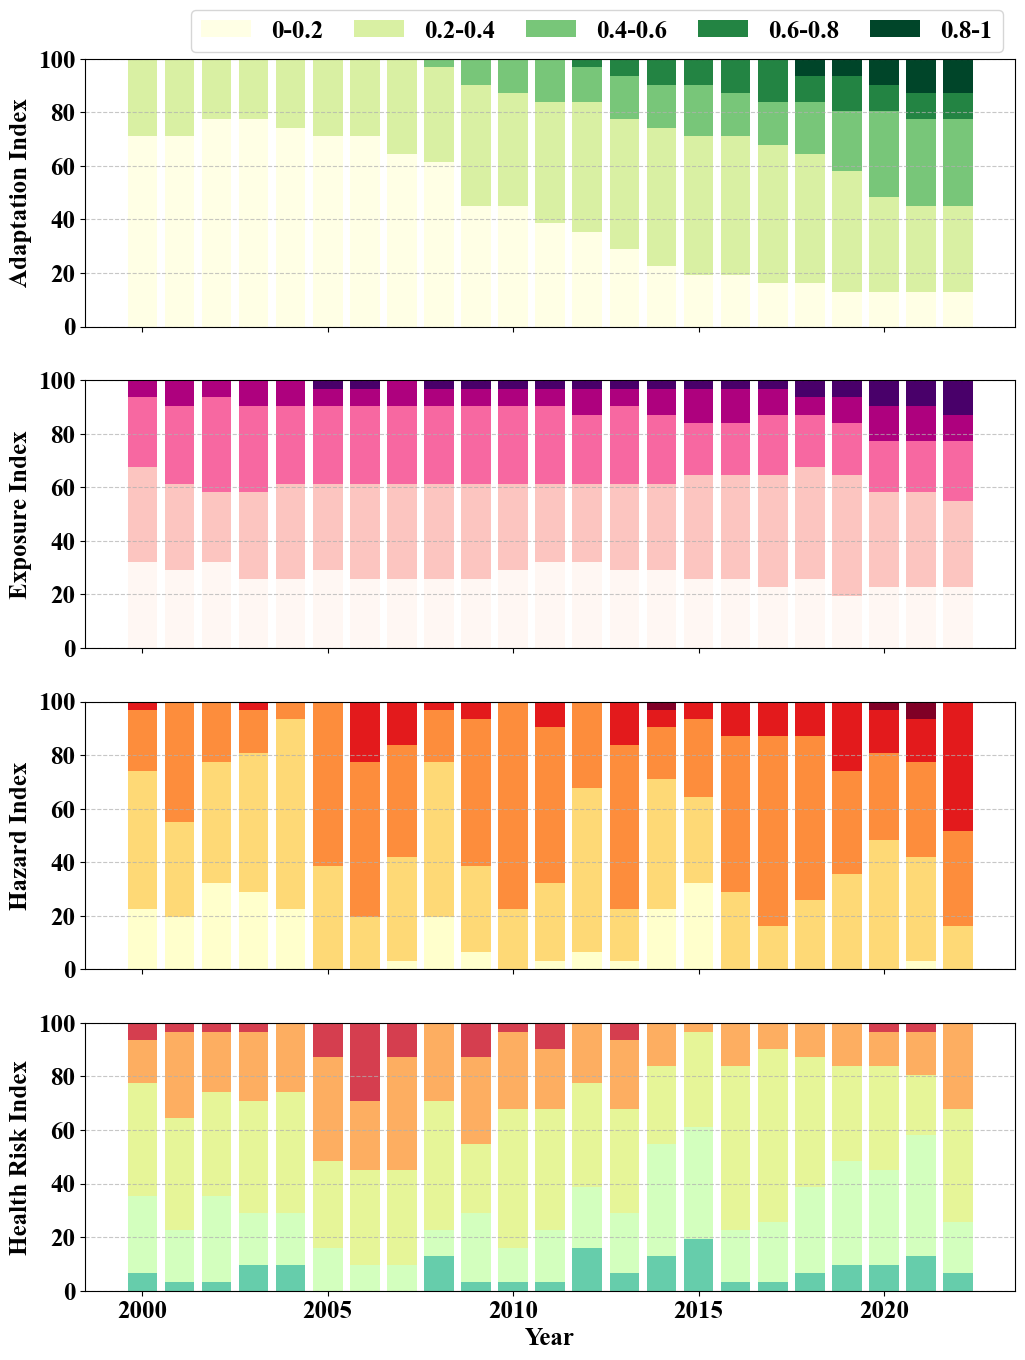

In [9]:
# 重新绘制堆叠柱状图
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# 颜色方案对应
color_map = {
    "Hazard Index": ['#FFFFCC', '#FED976','#FD8D3C','#E31A1C','#800026'],
    "Exposure Index": [ '#FFF7F3', '#FCC5C0','#F768A1','#AE017E','#49006A'],
    "Adaptation Index": ['#FFFFE5', '#D9F0A3','#78C679','#238443','#004529'],
    "Health Risk Index": [ '#66CDAB', '#D3FFBE','#E6F598','#FDAE61','#D53E4F']
}

labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]

# 遍历4个指数，绘制子图
indices = ['Adaptation Index', 'Exposure Index','Hazard Index', 'Health Risk Index']
for i, index in enumerate(indices):
    ax = axes[i]
    bottom = None  # 初始化堆叠起始值

    # 选取对应指数的颜色
    colors = color_map[index]

    # 绘制每个区间的堆叠柱状图
    for j, label in enumerate(labels):
        col_name = f"{index}_{label}"
        if bottom is None:
            ax.bar(yearly_counts_percent['年份'], yearly_counts_percent[col_name], label=label, color=colors[j])
            bottom = yearly_counts_percent[col_name].copy()
        else:
            ax.bar(yearly_counts_percent['年份'], yearly_counts_percent[col_name], label=label, color=colors[j], bottom=bottom)
            bottom += yearly_counts_percent[col_name]

    ax.set_ylabel(index)
    ax.set_ylim(0, 100)  # 归一化后，最大值应为100%
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# 设置横坐标与图例
axes[-1].set_xlabel("Year")
axes[0].legend( bbox_to_anchor=(0.1, 1.01, 0.9, 0.22), ncol=5, mode="expand")
# axes[1].legend( bbox_to_anchor=(0.1, 1.01, 0.9, -1.5), ncol=5, mode="expand")
# plt.legend(fontsize=14, bbox_to_anchor=(0.1, 1.01, 0.9, 1.12), loc='lower left',
#            handletextpad=0.6, ncol=4, mode="expand", borderaxespad=0., handlelength=1.5)
# 总标题
# plt.suptitle("各年份不同指数的堆叠柱状图（按分级颜色）", fontsize=14)

# plt.tight_layout()
# 保存图像
plt.savefig(r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-06-02-指数年际变化2.png', dpi=400, bbox_inches='tight',facecolor="none", transparent=True)
plt.show()

In [8]:
# # 打印各指数区间的百分比结果
# for index in ['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']:
#     cols = [f"{index}_{lab}" for lab in labels]
#     print(f"\n===== {index} 各区间占比(%) =====")
#     print(yearly_counts_percent[['年份'] + cols].round(2))  # 保留两位小数
import pandas as pd

# 输出文件路径
output_path = "index_bins_percent.xlsx"

# 把四个指数的百分比结果拼接成长表格
records = []
for index in ['Hazard Index', 'Exposure Index', 'Adaptation Index', 'Health Risk Index']:
    for lab in labels:  # labels 就是 ["0-0.2","0.2-0.4","0.4-0.6","0.6-0.8","0.8-1"]
        col = f"{index}_{lab}"
        for year, val in zip(yearly_counts_percent['年份'], yearly_counts_percent[col]):
            records.append({
                "年份": year,
                "指数": index,
                "区间": lab,
                "占比(%)": round(val, 2)  # 保留两位小数
            })

# 转成 DataFrame
result_df = pd.DataFrame(records)

# 导出到 Excel
result_df.to_excel(output_path, index=False)

print(f"结果已保存到: {output_path}")


结果已保存到: index_bins_percent.xlsx
